<a href="https://colab.research.google.com/github/j88k77/Machine-Learning-Projects/blob/main/P6_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Gold Price Prediction using Random Forest Regressor ***


In [2]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #ensemle is used to imporve performance and accuracy
from sklearn import metrics

***Data Collection and Processing***

In [4]:
#loading csv data into pandas dataframe
gold_data= pd.read_csv('/content/gold_price_data.csv')

In [5]:
#print first 5 rows of dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#print last 5 rows of the dataset
gold_data.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
#getting some basic info about the data
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [9]:
#checking missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


***Correlation***

***1--> Postive Correlation(directly proportional)***


***2-->Negative Correlation(indirectly proportional)***

In [16]:
correlation=gold_data.corr()

<ipython-input-16-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

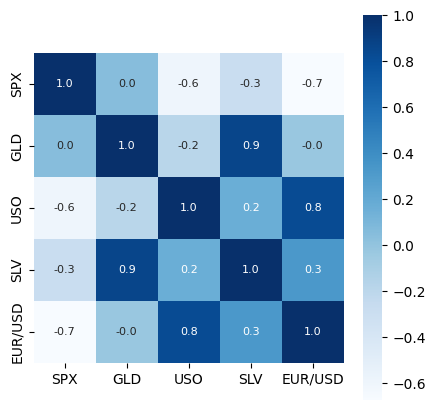

In [17]:
#constructing the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
#cbar(Color Bar) --> it shows how much correlated the values are
#square --> To present all the values in square shape
#fmt --> To get the values till given decimal point
#annot --> To present labels in front of their values
#annot_kws --> size of annotation
#cmap --> color of the heatmap (the Darker the color the more the corelated and vice versa)

In [18]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-19-91d42ce9d5a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

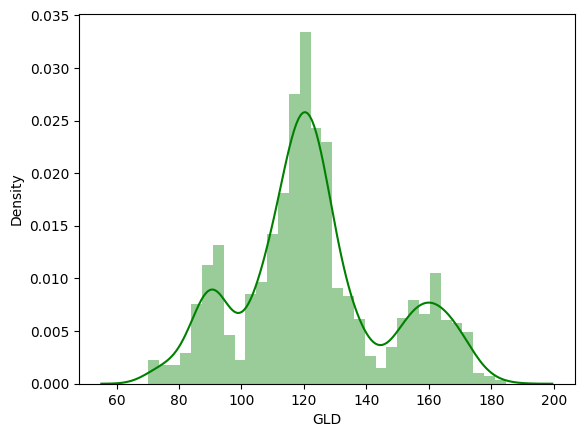

In [19]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

***Spillting the features and Target***

In [20]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


***Splitting the Training and Testing Data***

In [23]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

***Model Training***



In [25]:
regressor= RandomForestRegressor(n_estimators=100)
#n_estimators is how many trees you want in your forest.
#More trees can make better guesses, but they also take longer to grow and use more resources.
#The usual number of trees is 100, but you can change it if you want.

In [27]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

***Model Evaluation***

In [30]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[168.69069965  81.80430003 115.80750013 127.80380095 120.54420187
 154.71009792 150.19389752 126.07840081 117.47819864 125.98470043
 116.57200104 171.95050048 141.77899861 167.64529896 115.21710011
 117.36300057 137.63450334 169.80680078 159.42840306 155.05199938
 155.12239997 125.18090044 176.88309989 157.55270357 125.17170024
  93.70329982  77.70410026 120.53159996 119.06279907 167.41179822
  88.23770041 125.33279999  91.09750079 117.63760039 121.12819924
 135.97620094 115.49630094 114.9285008  147.8817995  107.41250137
 104.08150252  87.27089778 126.45590092 118.06159996 152.96759908
 119.72269996 108.46699989 108.01329805  93.16550055 127.137798
  74.98860034 113.56219906 121.43560011 111.13019923 118.81569897
 120.59299921 159.68610057 167.79910155 146.8280961   85.75749867
  94.25710047  86.79039861  90.48200027 119.05600055 126.4407007
 127.63840007 169.60230063 122.33559947 117.34969918  98.84770039
 167.98870092 142.851099   132.23740249 121.22490261 121.66029957
 119.45840044

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error is:', error_score)

R squared error is: 0.9886196022329564


***Compare the actual values and Predicted values in a plot***

In [34]:
Y_test=list(Y_test)

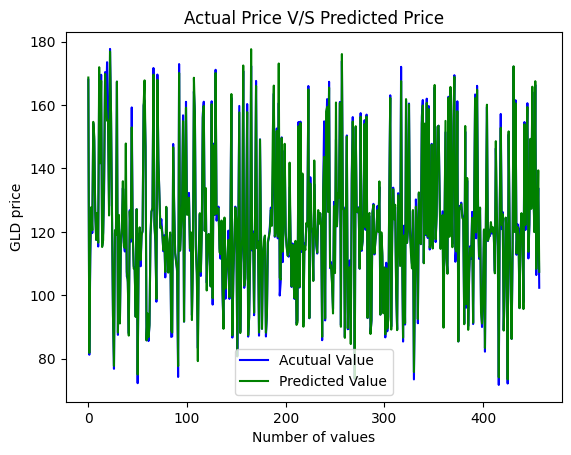

In [36]:
plt.plot(Y_test, color='blue',label='Acutual Value')
plt.plot(test_data_prediction, color='green', label="Predicted Value")
plt.title("Actual Price V/S Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend() #A legend is a box that shows the meaning of different colors or markers used in the plot.
plt.show()